We can have subplots on one single figure

In [1]:
#importing the libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_title_short'>

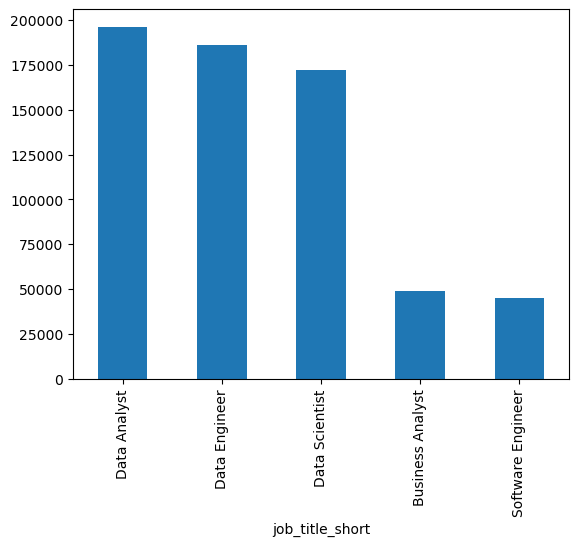

In [6]:
fig, ax = plt.subplots()

# to plot the count of various job types

df['job_title_short'].value_counts().head().plot(kind = 'bar', ax = ax)

In [7]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

THIS USES PANDAS SYNTAX

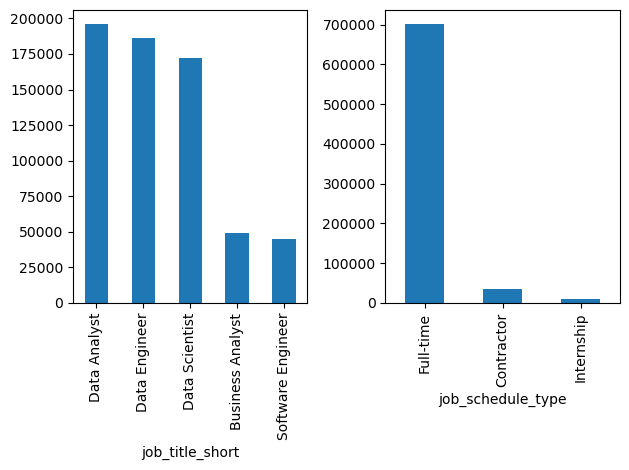

In [12]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().head().plot(kind = 'bar', ax = ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind= 'bar', ax = ax[1])


fig.tight_layout()

COUNTS OF TOP SKILLS IN JOB POSTINGS

Getting the count of skills demand based on different job titles
and plot them on one figure. 

In [18]:
#first, we expand the skills list using explode. so we can access each individual skill in the list.append

df_skills = df.copy()
df_skills = df_skills.explode('job_skills')

skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = skills_count.reset_index(name= 'skill_count')

df_skills_count.sort_values(by = 'skill_count', ascending= False, inplace=True)

In [19]:
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [20]:
# create a list for the data titles we want to plot

job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

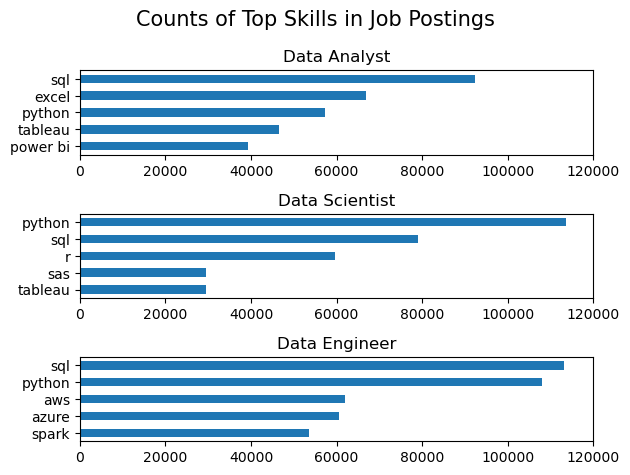

In [42]:
fig, ax = plt.subplots(3, 1)

# the i represents index (enumerate(job_titles) generates pairs of (index, job_title) for each item in the job_titles list.)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout()